## Simulation of Dynamics of Particles

$$
v_{n+1} = v_n + \frac{F_n}{m}dt\\
r_{n+1} = r_n + v_{n+1} dt
$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(8,8))

## Adjust axes limits according to your problem. Here we don't need more than a couple of meters left or right, and 600 meters up
ax.set(xlim=(-2, 2), ylim=(0, 600), xlabel='Position, meters', ylabel='Height, meters', title='Apple falling from CN tower')

# parameters of the problem
T = 10. #s
m = 0.3 #kg
g = 9.8 #m/s^2
v0x = -0.1 #m/s
H = 553. #m

# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T / dt)

# Allocating arrays for 2D problem
v = np.zeros((N+1, 2))
r = np.zeros((N+1, 2))
f = np.zeros((N+1, 2))

# initial conditions:
r[0] = np.array([0., H])
v[0] = np.array([-v0x, 0.])

# the only force is gravity
f[:] = np.array([0., -m * g])

## Run dynamics:
for n in range(N):
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

## drawing the first data point  
scat = ax.scatter(r[0,0], r[0,1], marker='o', c='g', s=200)

## animating 
def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, func=animate, frames=N)
## this function will create a lot of *.png files in a folder 'CNtower_frames'
## and create an HTML page with a simulation
ani.save('CNtower.html', writer=animation.HTMLWriter(fps= 1//dt))
plt.close()
#ani.save('CNtower.mp4', fps= 1//dt)

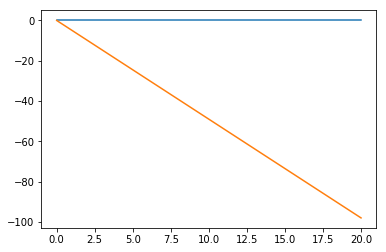

In [14]:
plt.plot(v)

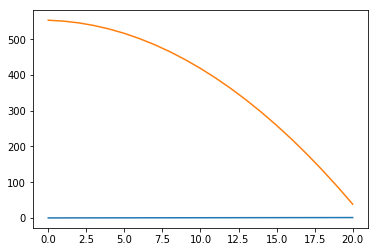

In [15]:
plt.plot(r)

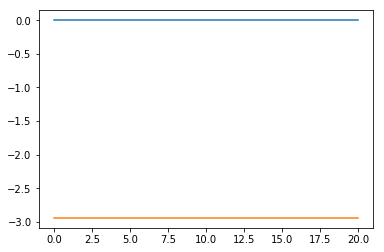

In [16]:
plt.plot(f)

In [17]:
from IPython.display import HTML
HTML('CNtower.html')

## 3 bodies
$$
\mathbf{F}_{ij} = -K_s(r_{ij} - r_0) \mathbf{r}_{ij} / r_{ij}
$$

$$
m_i \frac{d^2 \mathbf{r}_i(t)}{dt^2} = \sum_{i} \mathbf{F}_{ij}(t)
$$

In [18]:
# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5), ylabel='meters', xlabel='meters', title='3-Body problem')

# parameters of the problem
T = 10. #s
m = 1.0 #kg
ks = 5 #N/m
r0 = 1. #m

# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T / dt)

# Allocating arrays for 2D problem: first axis - time. second axis - particle's number. third - coordinate
v = np.zeros((N+1, 3, 2))
r = np.zeros((N+1, 3, 2))
f = np.zeros((N+1, 3, 2))

# initial conditions for 3 particles:
r[0,0] = np.array([0., 2.])
r[0,1] = np.array([2., 0.])
r[0,2] = np.array([-1., 0.])

def compute_forces(n):
    '''The function computes forces on each pearticle at time step n'''
    for i in range(3):
        for j in range(3):
            if i != j:
                rij = r[n,i] - r[n,j]
                rij_abs = np.linalg.norm(rij)
                f[n, i] -= ks * (rij_abs - r0) * rij / rij_abs 
## Run dynamics:
for n in range(N):
    compute_forces(n)
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

## drawing and animating 
scat = ax.scatter(r[0,:,0], r[0,:,1], marker='o', c=['b', 'k', 'r'], s=1000)

def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, animate, frames=N)
plt.close()
## this function will create a lot of *.png files in a folder '3Body_frames'
ani.save('3body.html', writer=animation.HTMLWriter(fps= 1//dt))

In [19]:
HTML('3body.html')

## OpenMM
http://comput-chem.com/tutorial_openmm/prepare_simulation

コマンドプロンプトで


conda install nglview -c conda-forge

conda config --add channels conda-forge
conda install mdanalysis

conda install -c conda-forge openmm

https://forum.biobakery.org/t/importerror-bio-alphabet-has-been-removed-from-biopython/1133

https://github.com/MDAnalysis/mdanalysis/issues/3050


In [1]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [2]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
import MDAnalysis as md
import nglview as ng
from sys import stdout

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject